In [59]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys,os,json
sys.path.append('../..')
import Project.profiles as pp
import Project.new_profiles as pnp
from Project.constants import Constants as pc
import Project.plot_assist as pa
from Project.fit_line import Fitline as fl
import matplotlib
from getdist import MCSamples, plots
from tqdm.notebook import tqdm
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'

In [39]:
sparcd = json.load(open('../../obs_RC_v4/Output/result_dicts/sparc_fit_dict.json','r'))
selgal = json.load(open('../../obs_RC_v4/Output/result_dicts/selected_gals.json','r'))
sparcb = json.load(open('../../obs_RC_v4/Output/result_dicts/sparc_bary_data.json','r'))
gals = json.load(open('../../Accessory/galnames.json','r'))

In [3]:
def getdist_plot(getsamples,clr,filename = None):
    g = plots.get_subplot_plotter()
    g.settings.figure_legend_frame = False
    g.settings.title_limit_fontsize = 13
    g.settings.alpha_filled_add = 0.4
    g.triangle_plot(getsamples,
                   filled = True,
                   legend_loc = 'upper right',
                   line_args = {'ls':'-','lw':2,'color':clr},
                   contour_colors = [clr],
                   title_limit = 1,
                   markers = getsamples.means)
    if filename:
        plt.savefig('%s'%filename,bbox_inches = 'tight',dpi = 300)

In [40]:
for prior in tqdm(list(sparcd.keys())):
    for gal in list(sparcd[prior].keys()):
        for fit in ['cusp_fit','core_fit']:
            bulge = sparcd[prior][gal]['bulge']
            fitfile = 'nfw_fit' if fit == 'cusp_fit' else 'sidm_fit'
            data = np.load('../../obs_RC_v4/Output/cluster_out/%s/%s/%s.npy'%(fitfile,prior,gal),allow_pickle=True)[()]
            samp = data['samples']
            pnam = ['lm','c200','yd'] if fit == 'cusp_fit' else ['lm','c200','r1','yd']
            if bulge:
                pnam.append('yb')

            samples = MCSamples(samples = samp,
                                labels = pnam,
                                names = ['%s'%x for x in pnam],
                                settings = dict(smooth_scale_2D = 2),
                                sampler = 'nested')

            stats = samples.getMargeStats()
            lm_lims = stats.parWithName('lm').limits
            lm_low,lm_upp = lm_lims[0].lower,lm_lims[0].upper
            lm_avg = samples.mean('lm')
            c2_lims = stats.parWithName('c200').limits
            c2_low,c2_upp = c2_lims[0].lower,c2_lims[0].upper
            c2_avg = samples.mean('c200')
            yd_lims = stats.parWithName('yd').limits
            yd_low,yd_upp = yd_lims[0].lower,yd_lims[0].upper
            yd_avg = samples.mean('yd')
            mstar = 10**sparcb[gal]['lmstar'][0]
            mstar_low,mstar_upp = yd_low*mstar,yd_upp*mstar
            mstar_avg = yd_avg*mstar
            if bulge:
                yb_lims = stats.parWithName('yb').limits
                yb_low,yb_upp = yb_lims[0].lower,yb_lims[0].upper
                yb_avg = samples.mean('yb')
                mbul = 10**sparcb[gal]['lmbul'][0]
                mbul_low,mbul_upp = yb_low*mbul,yb_upp*mbul
                mbul_avg = yb_avg*mbul
                mstar_low += mbul_low
                mstar_upp += mbul_upp
                mstar_avg += mbul_avg

            if len(sparcd[prior][gal][fit]['lm']) == 2:
                sparcd[prior][gal][fit]['lm'].append([lm_low,lm_avg,lm_upp])
                sparcd[prior][gal][fit]['c200'].append([c2_low,c2_avg,c2_upp])
                sparcd[prior][gal][fit]['yd'].append([yd_low,yd_avg,yd_upp])
                sparcd[prior][gal][fit]['mstar'].append([mstar_low,mstar_avg,mstar_upp])
                if bulge:
                    sparcd[prior][gal][fit]['yb'].append([yb_low,yb_avg,yb_upp])
                    

  0%|          | 0/5 [00:00<?, ?it/s]

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


In [42]:
bestd = {}
for prior in sparcd.keys():
    bestd[prior] = {'m200':[],'em200':[],'c200':[],'ec200':[],'mstar':[],
                    'emstar':[],'clr':[],'N':[0,0],'gals':[]}
    
    for gal in selgal[prior]:
        model = sparcd[prior][gal]['best_fit']
        sm = sparcd[prior][gal][model]
        
        mav = 10**sm['lm'][2][1]
        cav = sm['c200'][2][1]
        sav = sm['mstar'][2][1]
        
        m_m = 10**sm['lm'][2][0]
        c_m = sm['c200'][2][0]
        s_m = sm['mstar'][2][0]
        
        m_p = 10**sm['lm'][2][2]
        c_p = sm['c200'][2][2]
        s_p = sm['mstar'][2][2]
        
        bestd[prior]['m200'].append(mav)
        bestd[prior]['em200'].append([mav-m_m,m_p-mav])
        bestd[prior]['c200'].append(cav)
        bestd[prior]['ec200'].append([cav-c_m,c_p-cav])
        bestd[prior]['mstar'].append(sav)
        bestd[prior]['emstar'].append([sav-s_m,s_p-sav])
        clr = pa.green if model == 'cusp_fit' else pa.purple
        bestd[prior]['clr'].append(clr)
        if model == 'cusp_fit':
            bestd[prior]['N'][0] += 1
        elif model == 'core_fit':
            bestd[prior]['N'][1] += 1
        bestd[prior]['gals'].append(gal)
for prior in bestd.keys():
    bestd[prior]['m200'] = np.array(bestd[prior]['m200'])
    bestd[prior]['em200'] = np.array(bestd[prior]['em200'])
    bestd[prior]['c200'] = np.array(bestd[prior]['c200'])
    bestd[prior]['ec200'] = np.array(bestd[prior]['ec200'])
    bestd[prior]['mstar'] = np.array(bestd[prior]['mstar'])
    bestd[prior]['emstar'] = np.array(bestd[prior]['emstar'])
    
    bestd[prior]['em200'][bestd[prior]['em200'] < 0] = 0
    bestd[prior]['ec200'][bestd[prior]['ec200'] < 0] = 0
    bestd[prior]['emstar'][bestd[prior]['emstar'] < 0] = 0

In [43]:
key,ekey = 'c200','ec200'
for prior in bestd.keys():
    for i in range(len(bestd[prior][key])):
        mean = bestd[prior][key][i]
        minv = mean - bestd[prior][ekey][i][0]
        maxv = bestd[prior][ekey][i][1] + mean
        if not minv < mean:
            print ('min',prior,i,minv,mean)
        if not mean < maxv:
            print ('max',prior,i,mean,maxv)

In [44]:
def get_scat_MCR(m2,c2):
    lm = np.log10(m2)
    lc = np.log10(c2)
    lc_pred = pp.lc200_SR(lm)
    scatt = np.sqrt(((lc_pred - lc)**2).sum())/np.sqrt(len(m2)-1)
    return scatt
def get_scat_SHM(m2,ms):
    lm = np.log10(m2)
    ls = np.log10(ms)
    ls_pred = pnp.lmstar_behroozi_19(lm)
    scatt = np.sqrt(((ls_pred - ls)**2).sum())/np.sqrt(len(m2)-1)
    return scatt

In [45]:
prb_gals = []
for gal in gals:
    bestfitmodels = []
    for prior in sparcd.keys():
        if gal in selgal[prior]:
            bestfitmodels.append(sparcd[prior][gal]['best_fit'])
    if bestfitmodels:
        res = all(each == bestfitmodels[0] for each in bestfitmodels)
        if not res:
            prb_gals.append(gal)
            # print (gal,bestfitmodels)
        
print (prb_gals)

['ESO444-G084', 'F565-V2', 'F568-V1', 'F583-4', 'NGC2955', 'NGC3521', 'NGC3741', 'NGC3949', 'NGC4013', 'NGC4088', 'NGC4100', 'NGC4138', 'NGC4157', 'NGC4559', 'NGC5005', 'NGC5371', 'NGC5907', 'NGC6015', 'NGC6674', 'PGC51017', 'UGC00731', 'UGC02487', 'UGC02916', 'UGC03205', 'UGC04305', 'UGC04483', 'UGC04499', 'UGC05829', 'UGC05918', 'UGC06973', 'UGC07866', 'UGC09992', 'UGCA281', 'UGCA444']


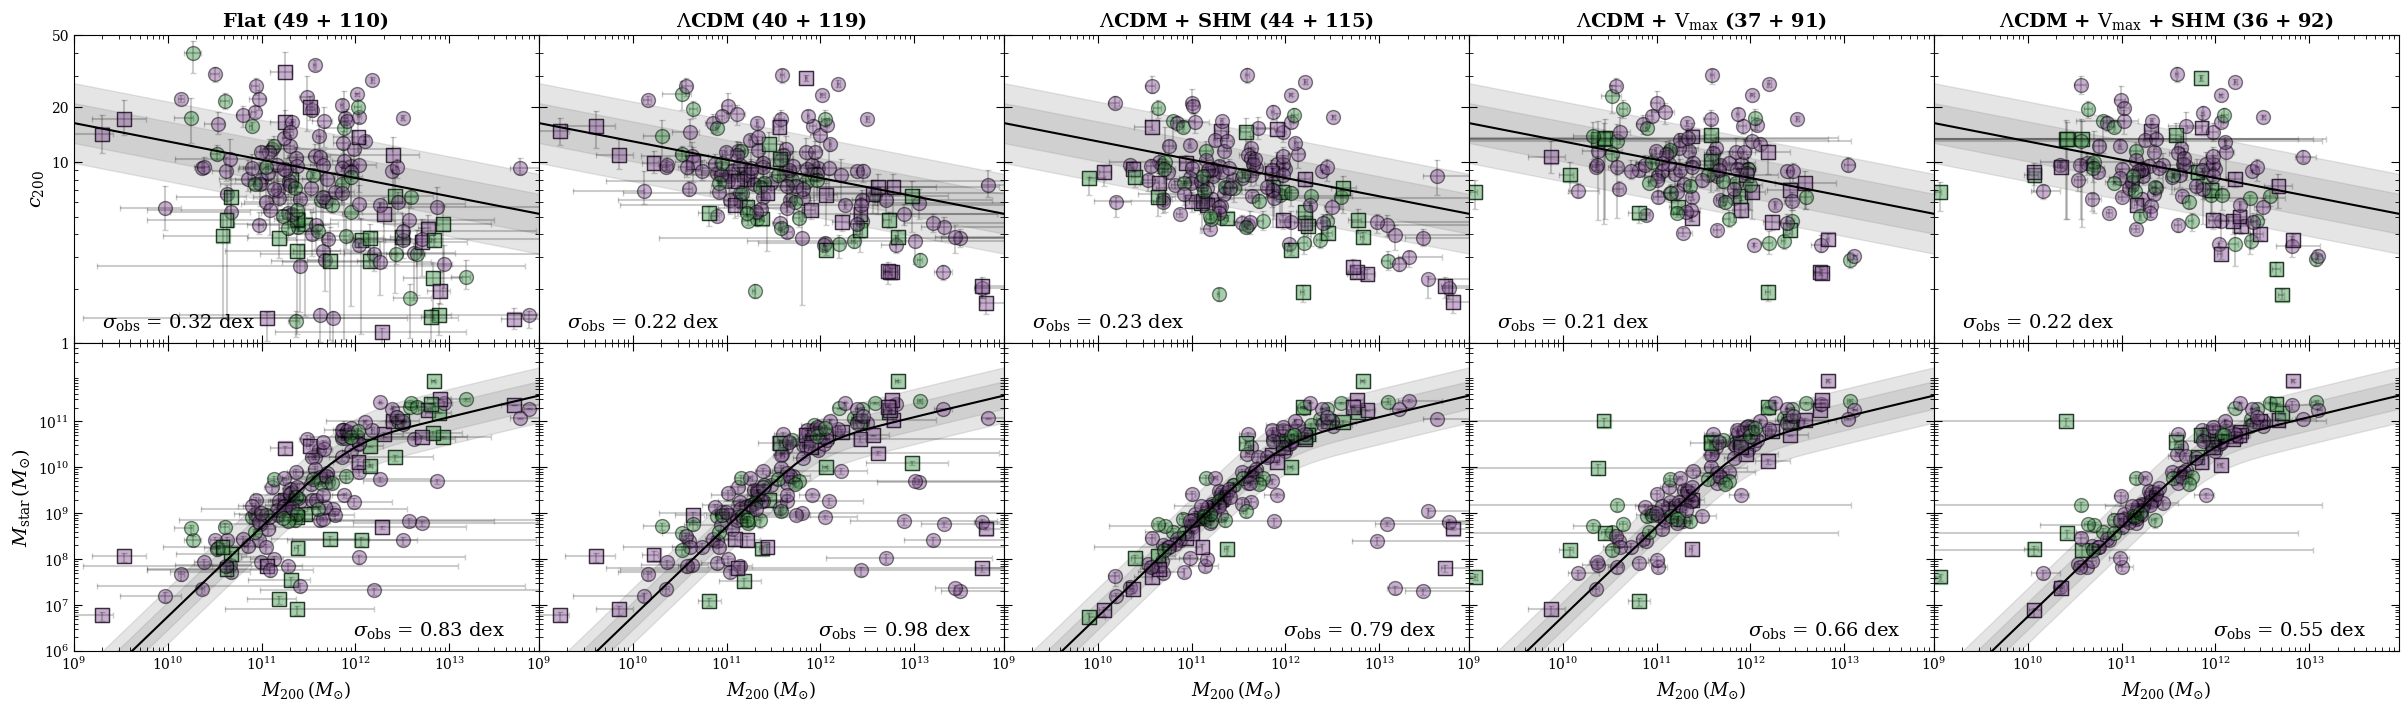

In [55]:
fig,axs = plt.subplots(2,5,figsize = (30,8),gridspec_kw = {'hspace':0, 'wspace':0}, sharex = True)
lm = np.linspace(.8,14,100)
lc = pp.lc200_SR(lm)
ls = pnp.lmstar_behroozi_19(lm)
titles = ['Flat','$\Lambda$CDM','$\Lambda$CDM + SHM',
          '$\Lambda$CDM + $\mathrm{V_{max}}$','$\Lambda$CDM + $\mathrm{V_{max}}$ + SHM']
for i in range(5):
    ax = axs[0][i]
    prior = ['flat','lcdm','lcdm_shm','lcdm_vmax','lcdm_vmax_shm'][i]
    
    m2 = bestd[prior]['m200']
    em2 = np.array(bestd[prior]['em200']).T
    c2 = bestd[prior]['c200']
    ec2 = np.array(bestd[prior]['ec200']).T
    ax.plot(10**lm,10**lc,c = 'k')
    ax.fill_between(10**lm, 10**(lc+0.11), 10**(lc-0.11), color = 'grey', alpha = 0.2)
    ax.fill_between(10**lm, 10**(lc+0.22), 10**(lc-0.22), color = 'grey', alpha = 0.2)
    ax.errorbar(m2,c2,xerr = em2, yerr = ec2, fmt = '.',color = 'none',ecolor = 'k',
                capsize = 2, alpha = 0.2)
    for j in range(len(m2)):
        gal = bestd[prior]['gals'][j]
        if gal in prb_gals:
            ax.scatter(m2[j],c2[j],color = bestd[prior]['clr'][j],marker = 's', s = 100, alpha = 0.5)
            ax.scatter(m2[j],c2[j],color = 'none',marker = 's', s = 100, edgecolor = 'k',alpha = 0.7)
        else:
            ax.scatter(m2[j],c2[j],color = bestd[prior]['clr'][j],marker = 'o', s = 100, alpha = 0.5,edgecolor = 'k')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e9,9e13)
    ax.set_ylim(1,50)
    ax.set_yticks([1,10,20,50])
    if i == 0:
        ax.set_yticklabels([1,10,20,50])
    else:
        ax.set_yticklabels([])
        
    ax.tick_params('both',direction = 'in',which = 'both', right = True, top = True)
    ax.tick_params('both',which = 'major',length = 6)
    ax.tick_params('both',which = 'minor',length = 3)
    
    if i == 0:
        ax.set_ylabel('$c_{200}$',size = 14)
    N = bestd[prior]['N']
    ax.set_title(titles[i] + ' (%i + %i)'%(N[0],N[1]),size = 14,fontweight = 'bold')
    scat = get_scat_MCR(m2,c2)
    ax.text(0.06,0.05,'$\sigma_{\mathrm{obs}}$ = %.2f dex'%(scat),transform = ax.transAxes,size = 14)
    
    ax = axs[1][i]
    ms = bestd[prior]['mstar']
    ems = bestd[prior]['emstar'].T
    ax.plot(10**lm, 10**ls, c = 'k')
    ax.fill_between(10**lm, 10**(ls+0.3),10**(ls-0.3), color = 'grey',alpha = 0.2)
    ax.fill_between(10**lm, 10**(ls+0.6),10**(ls-0.6), color = 'grey',alpha = 0.2)
    ax.errorbar(m2,ms,xerr = em2, yerr = ems, fmt = '.', color = 'none', ecolor = 'k',
                 capsize = 2, alpha = 0.2)
    for j in range(len(m2)):
        gal = bestd[prior]['gals'][j]
        if gal in prb_gals:
            ax.scatter(m2[j],ms[j],color = bestd[prior]['clr'][j],marker = 's', s = 100, alpha = 0.5)
            ax.scatter(m2[j],ms[j],color = 'none',marker = 's', s = 100, edgecolor = 'k',alpha = 0.7)
        else:
            ax.scatter(m2[j],ms[j],color = bestd[prior]['clr'][j],marker = 'o', s = 100, alpha = 0.5,edgecolor = 'k')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_yticks([1e5,1e6,1e7,1e8,1e9,1e10,1e11])
    if i == 0:
        ax.set_yticklabels(['$10^5$','$10^6$','$10^7$','$10^8$','$10^9$','$10^{10}$','$10^{11}$'])
    else:
        ax.set_yticklabels([])
        
    ax.tick_params('both',direction = 'in',which = 'both', right = True, top = True)
    ax.tick_params('both',which = 'major',length = 6)
    ax.tick_params('both',which = 'minor',length = 3)

    ax.set_xlim(1e9,9e13)
    ax.set_ylim(1e6,5e12)
    ax.set_xlabel('$M_{200}\,(M_{\odot})$',size = 13)
    if i == 0:
        ax.set_ylabel('$M_{\mathrm{star}}\, (M_{\odot})$',size = 14)
    scat = get_scat_SHM(m2,ms)
    ax.text(0.6,0.05,'$\sigma_{\mathrm{obs}}$ = %.2f dex'%(scat),transform = ax.transAxes, size = 14)
plt.savefig('../Output/plots_for_report/SPARC_scaling_relations.pdf',bbox_inches = 'tight',dpi = 300)

In [51]:
res_all = {}
res_brr = {}
for prior in sparcd.keys():
    res_all[prior] = []
    res_brr[prior] = []
    for gal in selgal[prior]:
        res_all[prior].append(sparcd[prior][gal]['delta_lnZ'])
        if gal in prb_gals:
            continue
        else:
            res_brr[prior].append(sparcd[prior][gal]['delta_lnZ'])

In [52]:
pers = []
priors = ['flat','lcdm','lcdm_shm','lcdm_vmax','lcdm_vmax_shm']
for prior in priors:
    lz = np.abs(np.array(res_brr[prior]))
    lz1 = lz[5 < lz]
    lz2 = lz[(3 < lz) & (lz <= 5)]
    lz3 = lz[(1 < lz) & (lz <= 3)]
    lz4 = lz[(0 < lz) & (lz <= 1)]
    pers.append([len(lz1)/len(lz),len(lz2)/len(lz),len(lz3)/len(lz),len(lz4)/len(lz)])
print (priors)
print (np.around(np.array(pers)*100,1))

['flat', 'lcdm', 'lcdm_shm', 'lcdm_vmax', 'lcdm_vmax_shm']
[[37.6  8.  32.  22.4]
 [44.8 12.8 25.6 16.8]
 [44.8  9.6 30.4 15.2]
 [39.8  9.7 32.  17.5]
 [40.8  7.8 33.  17.5]]


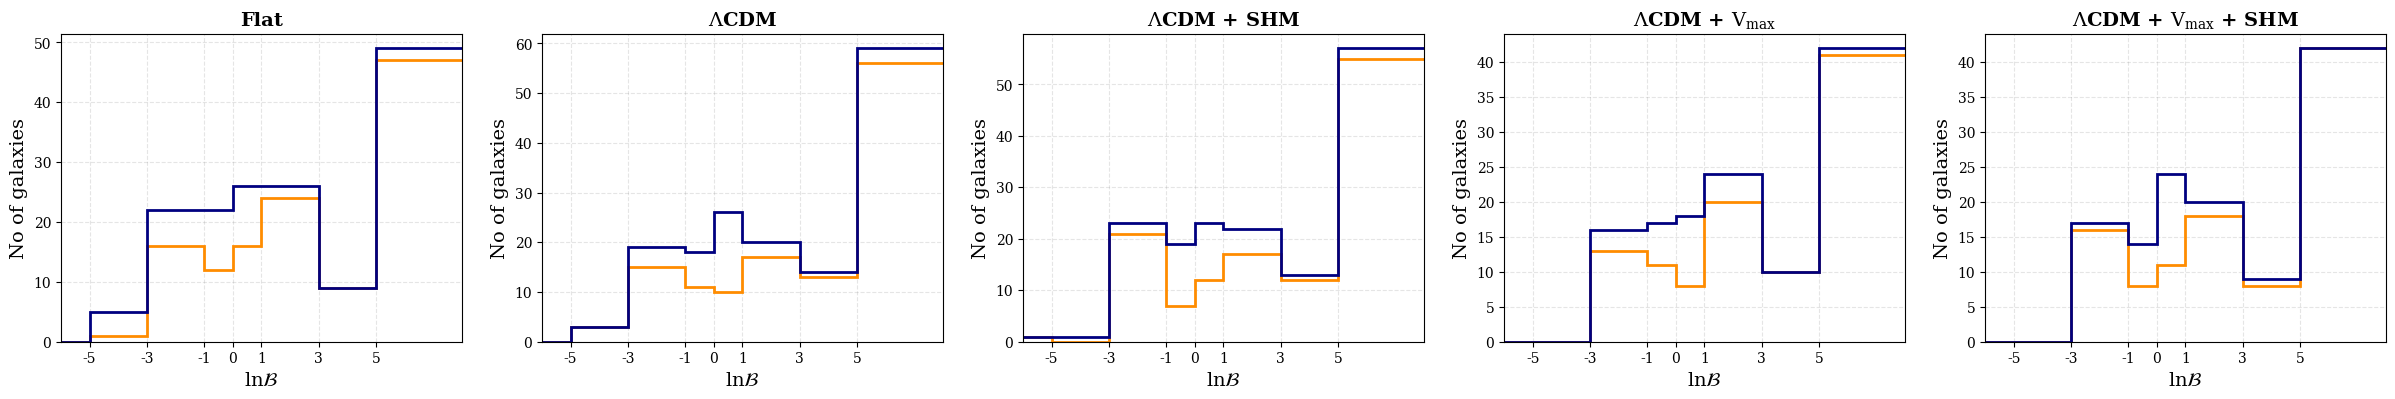

In [54]:
fig,axs = plt.subplots(1,5,figsize = (30,4))
titles = ['Flat','$\Lambda$CDM','$\Lambda$CDM + SHM',
          '$\Lambda$CDM + $\mathrm{V_{max}}$','$\Lambda$CDM + $\mathrm{V_{max}}$ + SHM']
for i in range(5):
    prior = ['flat','lcdm','lcdm_shm','lcdm_vmax','lcdm_vmax_shm'][i]
    ax = axs[i]
    ax.hist(res_brr[prior],bins = [-10,-5,-3,-1,0,1,3,5,1000],histtype = 'step',color = (1,1,1),edgecolor = 'darkorange',lw = 2)
    ax.hist(res_all[prior],bins = [-10,-5,-3,-1,0,1,3,5,1000],histtype = 'step',color = (1,1,1),edgecolor = 'navy',lw = 2)
    ax.set_xticks([-5,-3,-1,0,1,3,5])
    ax.set_xticklabels([-5,-3,-1,0,1,3,5])
    ax.set_xlim(-6,8)
    ax.grid(color = 'grey',alpha = 0.2,ls = '--')
    ax.set_ylabel('No of galaxies',size = 14)
    ax.set_xlabel('ln$\mathcal{B}$',size = 14)
    ax.set_title(titles[i],size = 14, fontweight = 'bold')
plt.savefig('../Output/plots_for_report/sparc_distrubtion_of_lnZ.png',bbox_inches = 'tight',dpi = 300)

# Baryonic Relations

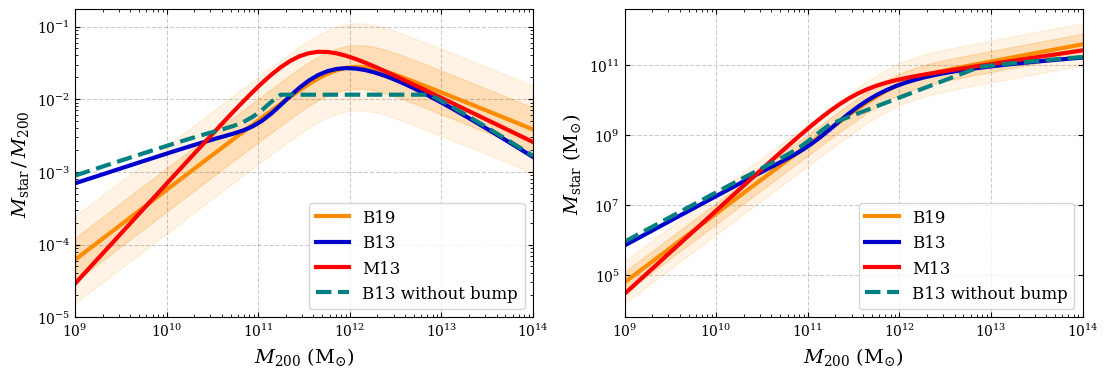

In [56]:
lm = np.linspace(9.,14,50)
ls_b13 = pnp.lmstar_behroozi_13(lm)
ls_b19 = pnp.lmstar_behroozi_19(lm)
ls_nbp = pnp.lmstar_behroozi_nbp(lm)
ls_m13 = pnp.lmstar_moster_13(lm)
fig,axs = plt.subplots(1,2,figsize = (13,4))
ax1,ax2 = axs
c1,c2,c3 = 'darkorange','mediumblue','teal'

ax1.plot(10**lm, 10**ls_b19/10**lm, c = c1, lw = 3, label = 'B19')
ax1.fill_between(10**lm, 10**(ls_b19 + 0.3)/10**lm, 10**(ls_b19-0.3)/10**lm, color = c1, alpha = 0.2)
ax1.fill_between(10**lm, 10**(ls_b19 + 0.6)/10**lm, 10**(ls_b19-0.6)/10**lm, color = c1, alpha = 0.1)
ax1.plot(10**lm, 10**ls_b13/10**lm, c = c2, lw = 3, label = 'B13')
ax1.plot(10**lm, 10**ls_m13/10**lm, c = 'r', lw = 3, label = 'M13')
ax1.plot(10**lm, 10**ls_nbp/10**lm, c = c3,ls = '--', lw = 3, label = 'B13 without bump')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(1e9,1e14)
ax1.tick_params(axis='both',which = 'both', direction = 'in', top = True, right = True)
ax1.grid(color = 'k', alpha = 0.2, ls = '--')
ax1.legend(loc = 'lower right',prop = {'size':12})
ax1.set_xlabel(r'$M_{200}\,\,\mathrm{(M_{\odot})}$',size = 14)
ax1.set_ylabel(r'$M_{\mathrm{star}}\,/\,M_{200}}$',size = 14)


ax2.plot(10**lm, 10**ls_b19, c = c1,lw = 3, label = 'B19')
ax2.fill_between(10**lm, 10**(ls_b19 + 0.3), 10**(ls_b19-0.3), color = c1, alpha = 0.2)
ax2.fill_between(10**lm, 10**(ls_b19 + 0.6), 10**(ls_b19-0.6), color = c1, alpha = 0.1)
ax2.plot(10**lm, 10**ls_b13, c = c2, lw = 3, label = 'B13')
ax2.plot(10**lm, 10**ls_m13, c = 'r', lw = 3, label = 'M13')
ax2.plot(10**lm, 10**ls_nbp, c = c3,ls = '--', lw = 3, label = 'B13 without bump')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(1e9,1e14)
ax2.tick_params(axis='both',which = 'both', direction = 'in', top = True, right = True)
ax2.grid(color = 'k', alpha = 0.2, ls = '--')
ax2.legend(loc = 'lower right',prop = {'size':12})
ax2.set_xlabel(r'$M_{200}\,\,\mathrm{(M_{\odot})}$',size = 14)
ax2.set_ylabel(r'$M_{\mathrm{star}}\,\,\mathrm{(M_{\odot})}$',size = 14)

plt.savefig('../Output/plots_for_report/SHM.pdf',bbox_inches = 'tight',dpi = 300)

In [63]:
prior = 'lcdm_vmax_shm'
Mstar,eMstar,Mgas,Rdgas,Rdstar,clrs = [],[],[],[],[],[]
for gal in sparcd[prior].keys():
    model = sparcd[prior][gal]['best_fit']
    Mstar.append(sparcd[prior][gal][model]['mstar'][0])
    eMstar.append(sparcd[prior][gal][model]['mstar'][1])
    Mgas.append(sparcd[prior][gal][model]['mgas'][0])
    Rdgas.append(sparcd[prior][gal][model]['rdgas'][0])
    Rdstar.append(sparcd[prior][gal][model]['rdstar'][0])
    clr = pa.green if model == 'cusp_fit' else pa.purple
    clrs.append(clr)
Mstar = np.array(Mstar)
eMstar = np.array(eMstar)
Mgas = np.array(Mgas)
Rdgas = np.array(Rdgas)
Rdstar = np.array(Rdstar)
eMgas = Mgas*0.1
eRdgas = Rdgas*0.1
eRdstar = Rdstar*0.1

In [60]:
line1 = fl(np.log10(Mstar),np.log10(Mgas),xerr = eMstar/Mstar, yerr = eMgas/Mgas,
           prior = 'flat', m_prior = [0.1,2], c_prior = [0.1,10])
line2 = fl(np.log10(Mgas),np.log10(Rdgas),xerr = eMgas/Mgas, yerr = eRdgas/Rdgas,
           prior = 'flat', m_prior = [0.1,10], c_prior = [-10,0])
line3 = fl(np.log10(Rdgas),np.log10(Rdstar),xerr = eRdgas/Rdgas, yerr = eRdstar/Rdstar,
           prior = 'flat', m_prior = [0.1,2], c_prior = [-1,1])
line1.fit()
line2.fit()
line3.fit()

DEBUG:ultranest:ReactiveNestedSampler: dims=2+0, resume=False, log_dir=../Output/Ultra/line, backend=hdf5, vectorized=False, nbootstraps=30, ndraw=128..65536


[ultranest] Sampling 400 live points from prior ...


INFO:ultranest:Sampling 400 live points from prior ...
DEBUG:ultranest:run_iter dlogz=0.5, dKL=0.5, frac_remain=0.01, Lepsilon=0.0010, min_ess=400
DEBUG:ultranest:max_iters=-1, max_ncalls=-1, max_num_improvement_loops=-1, min_num_live_points=400, cluster_num_live_points=40
DEBUG:ultranest:minimal_widths_sequence: [(-inf, 400.0), (inf, 400.0)]


DEBUG:ultranest:iteration=0, ncalls=401, regioncalls=40, ndraw=40, logz=-inf, remainder_fraction=100.0000%, Lmin=-334879.72, Lmax=-304.67
DEBUG:ultranest:iteration=40, ncalls=443, regioncalls=1720, ndraw=40, logz=-215467.55, remainder_fraction=100.0000%, Lmin=-215262.66, Lmax=-304.67
DEBUG:ultranest:iteration=80, ncalls=483, regioncalls=3320, ndraw=40, logz=-156867.21, remainder_fraction=100.0000%, Lmin=-156724.71, Lmax=-304.67
DEBUG:ultranest:iteration=90, ncalls=497, regioncalls=3880, ndraw=40, logz=-151798.83, remainder_fraction=100.0000%, Lmin=-151439.92, Lmax=-304.67
DEBUG:ultranest:iteration=120, ncalls=531, regioncalls=5240, ndraw=40, logz=-131813.33, remainder_fraction=100.0000%, Lmin=-131523.41, Lmax=-304.67
DEBUG:ultranest:iteration=160, ncalls=577, regioncalls=7080, ndraw=40, logz=-115493.22, remainder_fraction=100.0000%, Lmin=-115154.05, Lmax=-304.67
DEBUG:ultranest:iteration=180, ncalls=600, regioncalls=8000, ndraw=40, logz=-104575.16, remainder_fraction=100.0000%, Lmin=-1

[ultranest] Explored until L=-3e+02  


INFO:ultranest:Explored until L=-3e+02  


[ultranest] Likelihood function evaluations: 7735


INFO:ultranest:Likelihood function evaluations: 7735


[ultranest] Writing samples and results to disk ...


INFO:ultranest:Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


INFO:ultranest:Writing samples and results to disk ... done
DEBUG:ultranest:did a run_iter pass!


[ultranest]   logZ = -290.4 +- 0.1095


INFO:ultranest:  logZ = -290.4 +- 0.1095


[ultranest] Effective samples strategy satisfied (ESS = 1585.9, need >400)


INFO:ultranest:Effective samples strategy satisfied (ESS = 1585.9, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


INFO:ultranest:Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)


INFO:ultranest:Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.01 total:0.11 required:<0.50


INFO:ultranest:  logZ error budget: single: 0.15 bs:0.11 tail:0.01 total:0.11 required:<0.50


[ultranest] done iterating.


INFO:ultranest:done iterating.
DEBUG:ultranest:ReactiveNestedSampler: dims=2+0, resume=False, log_dir=../Output/Ultra/line, backend=hdf5, vectorized=False, nbootstraps=30, ndraw=128..65536


Removed no burn in
slope = 0.52 +- 0.01
intcp = 4.44 +- 0.14
sig_obs = 0.33 dex
[ultranest] Sampling 400 live points from prior ...


INFO:ultranest:Sampling 400 live points from prior ...
DEBUG:ultranest:run_iter dlogz=0.5, dKL=0.5, frac_remain=0.01, Lepsilon=0.0010, min_ess=400
DEBUG:ultranest:max_iters=-1, max_ncalls=-1, max_num_improvement_loops=-1, min_num_live_points=400, cluster_num_live_points=40
DEBUG:ultranest:minimal_widths_sequence: [(-inf, 400.0), (inf, 400.0)]


DEBUG:ultranest:iteration=0, ncalls=401, regioncalls=40, ndraw=40, logz=-inf, remainder_fraction=100.0000%, Lmin=-483467.96, Lmax=-66.55
DEBUG:ultranest:iteration=40, ncalls=443, regioncalls=1720, ndraw=40, logz=-440432.24, remainder_fraction=100.0000%, Lmin=-439358.69, Lmax=-66.55
DEBUG:ultranest:iteration=80, ncalls=486, regioncalls=3440, ndraw=40, logz=-413194.64, remainder_fraction=100.0000%, Lmin=-412883.12, Lmax=-66.55
DEBUG:ultranest:iteration=90, ncalls=498, regioncalls=3920, ndraw=40, logz=-405798.52, remainder_fraction=100.0000%, Lmin=-404880.25, Lmax=-66.55
DEBUG:ultranest:iteration=120, ncalls=534, regioncalls=5360, ndraw=40, logz=-391840.30, remainder_fraction=100.0000%, Lmin=-391477.50, Lmax=-66.55
DEBUG:ultranest:iteration=160, ncalls=577, regioncalls=7080, ndraw=40, logz=-374591.17, remainder_fraction=100.0000%, Lmin=-374132.54, Lmax=-66.55
DEBUG:ultranest:iteration=180, ncalls=603, regioncalls=8120, ndraw=40, logz=-364452.54, remainder_fraction=100.0000%, Lmin=-362316.

[ultranest] Explored until L=-6e+01  


INFO:ultranest:Explored until L=-6e+01  


[ultranest] Likelihood function evaluations: 8248


INFO:ultranest:Likelihood function evaluations: 8248


[ultranest] Writing samples and results to disk ...


INFO:ultranest:Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


INFO:ultranest:Writing samples and results to disk ... done
DEBUG:ultranest:did a run_iter pass!


[ultranest]   logZ = -73.64 +- 0.09824


INFO:ultranest:  logZ = -73.64 +- 0.09824


[ultranest] Effective samples strategy satisfied (ESS = 1573.7, need >400)


INFO:ultranest:Effective samples strategy satisfied (ESS = 1573.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


INFO:ultranest:Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)


INFO:ultranest:Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)


[ultranest]   logZ error budget: single: 0.16 bs:0.10 tail:0.01 total:0.10 required:<0.50


INFO:ultranest:  logZ error budget: single: 0.16 bs:0.10 tail:0.01 total:0.10 required:<0.50


[ultranest] done iterating.


INFO:ultranest:done iterating.
DEBUG:ultranest:ReactiveNestedSampler: dims=2+0, resume=False, log_dir=../Output/Ultra/line, backend=hdf5, vectorized=False, nbootstraps=30, ndraw=128..65536


Removed no burn in
slope = 0.59 +- 0.02
intcp = -4.80 +- 0.22
sig_obs = 0.15 dex
[ultranest] Sampling 400 live points from prior ...


INFO:ultranest:Sampling 400 live points from prior ...
DEBUG:ultranest:run_iter dlogz=0.5, dKL=0.5, frac_remain=0.01, Lepsilon=0.0010, min_ess=400
DEBUG:ultranest:max_iters=-1, max_ncalls=-1, max_num_improvement_loops=-1, min_num_live_points=400, cluster_num_live_points=40
DEBUG:ultranest:minimal_widths_sequence: [(-inf, 400.0), (inf, 400.0)]


DEBUG:ultranest:iteration=0, ncalls=401, regioncalls=40, ndraw=40, logz=-inf, remainder_fraction=100.0000%, Lmin=-8496.58, Lmax=-109.60
DEBUG:ultranest:iteration=40, ncalls=443, regioncalls=1720, ndraw=40, logz=-3173.48, remainder_fraction=100.0000%, Lmin=-3133.97, Lmax=-107.89
DEBUG:ultranest:iteration=80, ncalls=492, regioncalls=3680, ndraw=40, logz=-2554.00, remainder_fraction=100.0000%, Lmin=-2540.06, Lmax=-107.89
DEBUG:ultranest:iteration=90, ncalls=503, regioncalls=4120, ndraw=40, logz=-2379.62, remainder_fraction=100.0000%, Lmin=-2292.30, Lmax=-107.89
DEBUG:ultranest:iteration=120, ncalls=540, regioncalls=5600, ndraw=40, logz=-1958.39, remainder_fraction=100.0000%, Lmin=-1951.07, Lmax=-107.89
DEBUG:ultranest:iteration=160, ncalls=585, regioncalls=7400, ndraw=40, logz=-1601.36, remainder_fraction=100.0000%, Lmin=-1590.73, Lmax=-107.89
DEBUG:ultranest:iteration=180, ncalls=613, regioncalls=8520, ndraw=40, logz=-1459.09, remainder_fraction=100.0000%, Lmin=-1452.60, Lmax=-107.89
DEB

[ultranest] Explored until L=-1e+02  


INFO:ultranest:Explored until L=-1e+02  


[ultranest] Likelihood function evaluations: 6315


INFO:ultranest:Likelihood function evaluations: 6315


[ultranest] Writing samples and results to disk ...


INFO:ultranest:Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


INFO:ultranest:Writing samples and results to disk ... done
DEBUG:ultranest:did a run_iter pass!


[ultranest]   logZ = -113.8 +- 0.07198


INFO:ultranest:  logZ = -113.8 +- 0.07198


[ultranest] Effective samples strategy satisfied (ESS = 1580.9, need >400)


INFO:ultranest:Effective samples strategy satisfied (ESS = 1580.9, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


INFO:ultranest:Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)


INFO:ultranest:Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)


[ultranest]   logZ error budget: single: 0.12 bs:0.07 tail:0.01 total:0.07 required:<0.50


INFO:ultranest:  logZ error budget: single: 0.12 bs:0.07 tail:0.01 total:0.07 required:<0.50


[ultranest] done iterating.


INFO:ultranest:done iterating.


Removed no burn in
slope = 0.91 +- 0.05
intcp = -0.38 +- 0.04
sig_obs = 0.24 dex


([0.9146613903536852, -0.3828816620125801],
 [0.04746810259465769, 0.04299527779006049],
 0.2423661511060588)

triangle (contour) plot saved in ../Output/plots_for_report/lmstar_lmgas_fit_contours.pdf
triangle (contour) plot saved in ../Output/plots_for_report/lmgas_rdgas_fit_contours.pdf
triangle (contour) plot saved in ../Output/plots_for_report/rdgas_rdstar_fit_contours.pdf


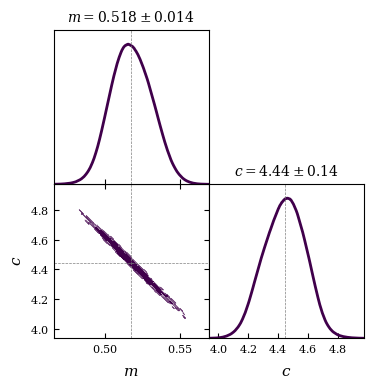

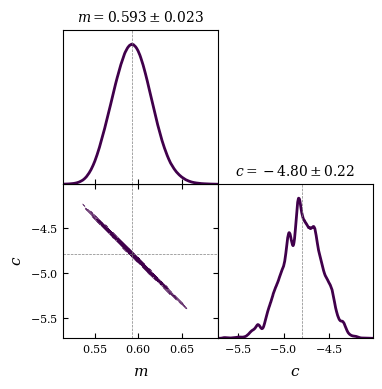

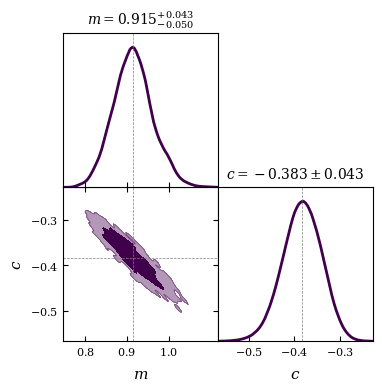

In [67]:
line1.getdict_contour('../Output/plots_for_report/lmstar_lmgas_fit_contours.pdf')
line2.getdict_contour('../Output/plots_for_report/lmgas_rdgas_fit_contours.pdf')
line3.getdict_contour('../Output/plots_for_report/rdgas_rdstar_fit_contours.pdf')

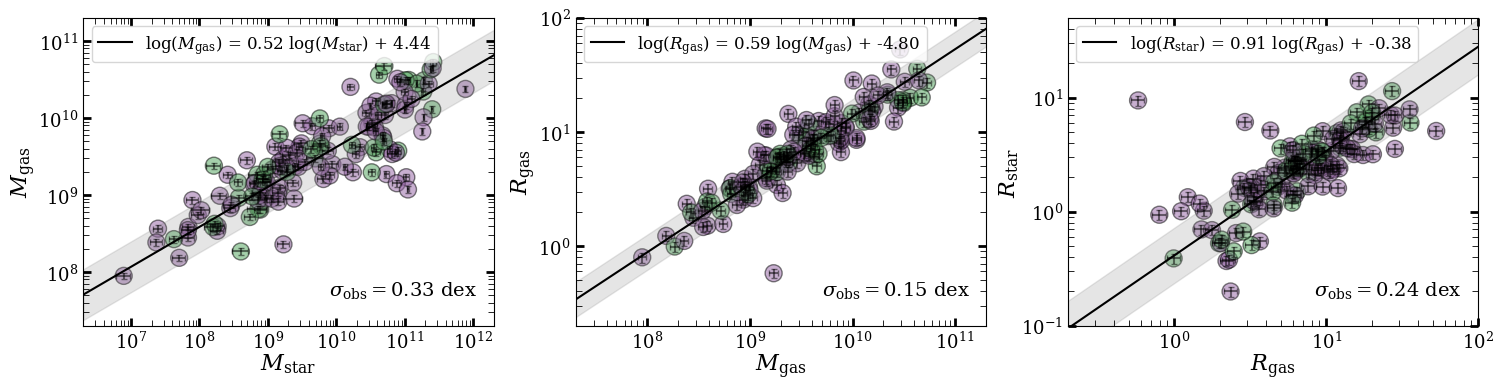

In [66]:
fig,axs = plt.subplots(1,3,figsize = (18,4))
mstar,mgas,rdstar,rdgas = '$M_{\mathrm{star}}$','$M_{\mathrm{gas}}$','$R_{\mathrm{star}}$','$R_{\mathrm{gas}}$'
ax1 = line1.plot_line(mstar,mgas,xlim = [np.log10(2e6),np.log10(2e12)], ylim =[np.log10(2e7),np.log10(2e11)], clr = clrs,
                errorbars = [eMstar,eMgas], alpha = 0.5, s = 150, ax = axs[0],
                xy_names = [' log$(M_{\mathrm{star}})$','log$(M_{\mathrm{gas}})$'])
ax2 = line2.plot_line(mgas,rdgas,ylim = [np.log10(0.2),np.log10(100)],xlim = [np.log10(2e7),np.log10(2e11)],
                clr = clrs, errorbars = [eMgas,eRdgas], alpha = 0.5, s = 150, ax = axs[1],
                xy_names = [' log$(M_{\mathrm{gas}})$','log$(R_{\mathrm{gas}})$'])
ax3 = line3.plot_line(rdgas,rdstar,ylim = [np.log10(0.1),np.log10(50)],xlim = [np.log10(0.2),2],
                clr = clrs, errorbars = [eRdgas,eRdstar], alpha = 0.5, s = 150, ax = axs[2],
                xy_names = [' log$(R_{\mathrm{gas}})$','log$(R_{\mathrm{star}})$'])
for ax in axs:
    ax.tick_params(which = 'both', direction = 'in', top = True, right = True)
    ax.tick_params(which = 'major', length = 6,width = 2,labelsize = 13)
    ax.tick_params(which = 'minor', length = 4)
    ax.legend(prop = {'size':12},loc = 'upper left')
    ax.set_xlabel(ax.get_xlabel(),size = 16, labelpad = 0)
    ax.set_ylabel(ax.get_ylabel(),size = 16, labelpad = 0)

ax1.text(0.6,0.1,'$\sigma_{\mathrm{obs}} = %.2f$ dex'%line1.sig_obs, 
         transform = ax1.transAxes,size = 14)
ax2.text(0.6,0.1,'$\sigma_{\mathrm{obs}} = %.2f$ dex'%line2.sig_obs, 
         transform = ax2.transAxes,size = 14)
ax3.text(0.6,0.1,'$\sigma_{\mathrm{obs}} = %.2f$ dex'%line3.sig_obs, 
         transform = ax3.transAxes,size = 14);

# x = np.linspace(6,11,10)
# y = 0.57*x + 3.86
# ax1.plot(10**x,10**y,c = 'darkorange',lw =2)

# x = np.linspace(np.log10(3e6),11,10)
# # Using relation by Dutton 09, mentioned in Brook.
# # This is generally good only for more massive galaxies.
# y = 0.49*x - 4.19
# ax2.plot(10**x,10**y,c = 'r')

# # using relation used in Brook
# y = 0.61*x - 4.87
# ax2.plot(10**x,10**y,c = 'cyan')

# x = np.linspace(np.log10(0.5),2,10)
# # Using Rgas = 1.5 Rstar
# y = 1*x - 0.18
# ax3.plot(10**x,10**y,c = 'r')

# x = np.linspace(np.log10(0.5),2,10)
# # Using Rgas = 3 Rstar (as in Brook)
# y = 1*x - 0.477
# ax3.plot(10**x,10**y,c = 'darkorange')

plt.savefig('../Output/plots_for_report/Obs_bry_SR.pdf',bbox_inches = 'tight',dpi = 300)
